Memprediksi harga <a href='https://finance.yahoo.com/quote/GOOG/history/'> saham google </a> berdasarkan saham 64 hari yang lalu

# Load data dan preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.pyplot import colormaps
plt.style.use('fivethirtyeight')

In [4]:
data= pd.read_csv('/content/drive/MyDrive/Datasets/stock_price/google_stock_price.csv', date_parser= True)

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
1,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
3,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
4,2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620
...,...,...,...,...,...,...,...
4480,2022-06-07,2312.959961,2354.972900,2302.510010,2344.590088,2344.590088,1320700
4481,2022-06-08,2337.530029,2372.919922,2333.935059,2344.760010,2344.760010,1127200
4482,2022-06-09,2326.830078,2367.000000,2297.340088,2298.360107,2298.360107,1157100
4483,2022-06-10,2255.625000,2269.939941,2217.219971,2228.550049,2228.550049,1566200


In [5]:
date_threshold= '2021-01-01'
data[data['Date']>= date_threshold]

,Date,Open,High,Low,Close,Adj Close,Volume
4121,2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1728.239990,1901900
4122,2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1740.920044,1145300
4123,2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,1735.290039,2602100
4124,2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,1787.250000,2265000
4125,2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,1807.209961,2050600
...,...,...,...,...,...,...,...
4480,2022-06-07,2312.959961,2354.972900,2302.510010,2344.590088,2344.590088,1320700
4481,2022-06-08,2337.530029,2372.919922,2333.935059,2344.760010,2344.760010,1127200
4482,2022-06-09,2326.830078,2367.000000,2297.340088,2298.360107,2298.360107,1157100
4483,2022-06-10,2255.625000,2269.939941,2217.219971,2228.550049,2228.550049,1566200


In [6]:
data_training = data[data['Date']<date_threshold].copy()
data_test = data[data['Date']>=date_threshold].copy()

In [7]:
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
1,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
3,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
4,2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620
...,...,...,...,...,...,...,...
4116,2020-12-24,1735.000000,1746.000000,1729.109985,1738.849976,1738.849976,346800
4117,2020-12-28,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000
4118,2020-12-29,1787.790039,1792.439941,1756.089966,1758.719971,1758.719971,1299400
4119,2020-12-30,1762.010010,1765.094971,1725.599976,1739.520020,1739.520020,1306100


In [8]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [9]:
scaler = MinMaxScaler()
scaled_data_training = scaler.fit_transform(data_training)
scaled_data_training

array([[5.10729413e-04, 2.03521039e-03, 4.38199754e-04, 2.32514214e-03,
        2.77885876e-01],
       [3.24397659e-03, 3.25522693e-03, 2.83986753e-03, 2.63049229e-03,
        2.22151352e-01],
       [3.38147960e-03, 2.73394743e-03, 1.30055252e-03, 1.36147087e-03,
        1.85522815e-01],
       ...,
       [9.79308338e-01, 9.69518841e-01, 9.62466798e-01, 9.61044247e-01,
        1.56478852e-02],
       [9.64785280e-01, 9.54297762e-01, 9.45273499e-01, 9.50246667e-01,
        1.57290641e-02],
       [9.49805947e-01, 9.50866174e-01, 9.50811033e-01, 9.57197618e-01,
        1.21644600e-02]])

In [10]:
scaled_data_training.shape

(4121, 5)

In [11]:
batch= 64

X_train= []
y_train= []

for i in range(batch, scaled_data_training.shape[0]):
    X_train.append(scaled_data_training[i-batch:i])
    y_train.append(scaled_data_training[i, 0])

In [12]:
X_train, y_train= np.array(X_train), np.array(y_train)

X_train.shape

(4057, 64, 5)

# Modeling

### LSTM

In [13]:
lstm_model= keras.Sequential([
    keras.layers.Input(X_train.shape[1:]),
    keras.layers.LSTM(256, 'tanh', return_sequences= True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(256, 'tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

In [14]:
lstm_model_path= 'weight_checkpoints/lstm-epoch:{epoch:0.1f}.ckpt'
model_checkpoint= keras.callbacks.ModelCheckpoint(lstm_model_path, monitor='loss', verbose=0, save_best_only=True, save_weights_only=True, mode='auto')

reduce_lr= keras.callbacks.ReduceLROnPlateau(monitor='loss', factor= 0.75, patience=1, min_lr=0.00001, min_delta=0.0001)

In [15]:
lstm_model.compile(optimizer='adam', loss = 'mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=15, batch_size=16, callbacks=[model_checkpoint, reduce_lr])

Epoch 1/15
254/254 [==============================] - 11s 13ms/step - loss: 0.0021 - lr: 0.0010
Epoch 2/15
254/254 [==============================] - 3s 12ms/step - loss: 5.5986e-04 - lr: 0.0010
Epoch 3/15
254/254 [==============================] - 3s 10ms/step - loss: 4.6476e-04 - lr: 0.0010
Epoch 4/15
254/254 [==============================] - 3s 11ms/step - loss: 4.8578e-04 - lr: 7.5000e-04
Epoch 5/15
254/254 [==============================] - 3s 12ms/step - loss: 4.3550e-04 - lr: 5.6250e-04
Epoch 6/15
254/254 [==============================] - 3s 10ms/step - loss: 4.9727e-04 - lr: 5.6250e-04
Epoch 7/15
254/254 [==============================] - 2s 10ms/step - loss: 4.1827e-04 - lr: 4.2187e-04
Epoch 8/15
254/254 [==============================] - 3s 10ms/step - loss: 3.4162e-04 - lr: 3.1641e-04
Epoch 9/15
254/254 [==============================] - 2s 10ms/step - loss: 2.9611e-04 - lr: 2.3730e-04
Epoch 10/15
254/254 [==============================] - 3s 10ms/step - loss: 2.8092e-04 -

### GRU

In [16]:
gru_model= keras.Sequential([
    keras.layers.Input(X_train.shape[1:]),
    keras.layers.GRU(256, 'tanh', return_sequences= True),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(256, 'tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

In [17]:
gru_model_path= 'weight_checkpoints/gru-epoch:{epoch:0.1f}.ckpt'
model_checkpoint= keras.callbacks.ModelCheckpoint(gru_model_path, monitor='loss', verbose=0, save_best_only=True, save_weights_only=True, mode='auto')

In [18]:
gru_model.compile(optimizer='adam', loss = 'mean_squared_error')
gru_model.fit(X_train, y_train, epochs=15, batch_size=16, callbacks=[model_checkpoint, reduce_lr])

Epoch 1/15
254/254 [==============================] - 5s 10ms/step - loss: 0.0021 - lr: 0.0010
Epoch 2/15
254/254 [==============================] - 2s 9ms/step - loss: 5.5582e-04 - lr: 0.0010
Epoch 3/15
254/254 [==============================] - 2s 9ms/step - loss: 5.6549e-04 - lr: 0.0010
Epoch 4/15
254/254 [==============================] - 2s 9ms/step - loss: 4.3833e-04 - lr: 7.5000e-04
Epoch 5/15
254/254 [==============================] - 2s 9ms/step - loss: 4.4051e-04 - lr: 7.5000e-04
Epoch 6/15
254/254 [==============================] - 2s 10ms/step - loss: 3.4006e-04 - lr: 5.6250e-04
Epoch 7/15
254/254 [==============================] - 2s 10ms/step - loss: 3.2520e-04 - lr: 4.2187e-04
Epoch 8/15
254/254 [==============================] - 2s 10ms/step - loss: 3.0531e-04 - lr: 4.2187e-04
Epoch 9/15
254/254 [==============================] - 3s 11ms/step - loss: 2.7055e-04 - lr: 3.1641e-04
Epoch 10/15
254/254 [==============================] - 4s 17ms/step - loss: 2.6718e-04 - lr: 

In [32]:
gru_model.load_weights('/content/weight_checkpoints/gru-epoch:14.0.ckpt')

# Evaluation

### Preprocess data test

In [19]:
past_days = data_training.tail(batch)
data_test = past_days.append(data_test, ignore_index = True)
data_test = data_test.drop(['Date', 'Adj Close'], axis = 1)
data_test.head()

,Open,High,Low,Close,Volume
0,1484.270020,1499.040039,1479.209961,1490.089966,1779500
1,1462.030029,1483.199951,1450.920044,1458.420044,1284100
2,1466.209961,1488.209961,1464.270020,1486.020020,1113300
3,1475.579956,1486.760010,1448.589966,1453.439941,1245400
4,1464.290039,1468.959961,1436.000000,1460.290039,1746200


In [20]:
scaled_data_test= scaler.transform(data_test)

scaled_data_test.shape

(428, 5)

In [21]:
batch= 64

X_test= []
y_test= []

for i in range(batch, scaled_data_test.shape[0]):
    X_test.append(scaled_data_test[i-batch:i])
    y_test.append(scaled_data_test[i, 0])

In [22]:
X_test, y_test= np.array(X_test), np.array(y_test)

X_test.shape

(364, 64, 5)

### Prediction and evaluating error

In [23]:
scaler.scale_

array([5.63345301e-04, 5.56631737e-04, 5.63899782e-04, 5.62375381e-04,
       1.21162615e-08])

In [24]:
y_scale= 1/scaler.scale_[0]

y_scale

1775.110219

In [25]:
y_test = y_test*y_scale
y_train_2 = y_train*y_scale

In [33]:
lstm_y_pred = lstm_model.predict(X_test)
lstm_y_pred = lstm_y_pred*y_scale

gru_y_pred = gru_model.predict(X_test)
gru_y_pred = gru_y_pred*y_scale

In [34]:
print(f'LSTM MRE: {mean_squared_error(y_test, lstm_y_pred)}')
print(f'GRU MRE: {mean_squared_error(y_test, gru_y_pred)}')

LSTM MRE: 6587.087830806544
GRU MRE: 1936.2902988034073


### Plot LSTM-GRU model comparison

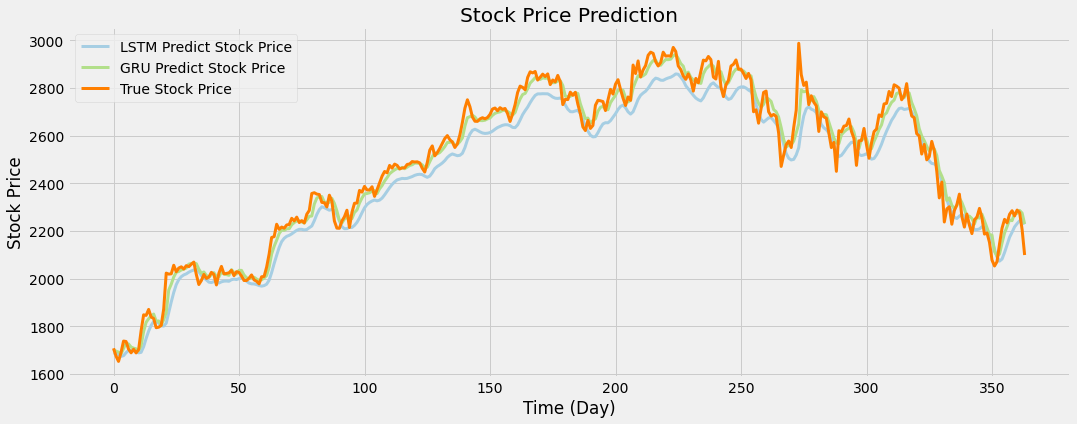

In [35]:
cmap = cm.get_cmap('Paired')
c= [colors.rgb2hex(cmap(ci)) for ci in range(len(cmap.colors))]

plt.figure(figsize=(16,6))

plt.plot(lstm_y_pred, color = c[0], label = 'LSTM Predict Stock Price', linewidth= 3)
plt.plot(gru_y_pred, color = c[2], label = 'GRU Predict Stock Price', linewidth= 3)
plt.plot(y_test, color = c[7], label = 'True Stock Price', linewidth= 3)

plt.title('Stock Price Prediction')
plt.xlabel('Time (Day)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()